In [1]:
import numpy as np
import cv2
import reid.datasets
import matplotlib.pyplot as plt
%matplotlib inline
import os.path as osp

from reid.utils.data.dataset import _pluck

In [2]:
OUTPUT_SHAPE = (H, W, _) = (128, 48, 3)

In [3]:
!ls ./datasets

cuhk01			  duke			    market_train.npz
cuhk03			  market-1501		    viper
cuhk03_test.npz		  market_test_correto.npz   viper_test.npz
cuhk03_train_correct.npz  market_test.npz	    viper_train.npz
cuhk03_train.npz	  market_train_correto.npz


In [4]:
dataset = reid.datasets.Market1501('./datasets/market-1501')

Files already downloaded and verified
Market1501 dataset loaded
  subset   | # ids | # images
  ---------------------------
  train    |   651 |    11253
  val      |   100 |     1683
  trainval |   751 |    12936
  query    |   750 |    16483
  gallery  |   751 |    19281


In [5]:
print(dataset.trainval[:10])

[('00000368_00_0000.jpg', 0, 0), ('00000368_00_0001.jpg', 0, 0), ('00000368_00_0002.jpg', 0, 0), ('00000368_01_0000.jpg', 0, 1), ('00000368_01_0001.jpg', 0, 1), ('00000368_01_0002.jpg', 0, 1), ('00000368_02_0000.jpg', 0, 2), ('00000368_02_0001.jpg', 0, 2), ('00000368_02_0002.jpg', 0, 2), ('00000368_02_0003.jpg', 0, 2)]


In [6]:
print(dataset.split)
print(len(dataset.split['trainval']))

{'query': [1, 3, 4, 5, 6, 8, 9, 13, 14, 15, 16, 17, 18, 19, 21, 24, 25, 26, 29, 31, 33, 34, 36, 38, 39, 40, 41, 44, 45, 49, 50, 51, 54, 55, 58, 60, 61, 62, 63, 66, 71, 72, 73, 74, 75, 78, 80, 83, 85, 87, 89, 91, 92, 94, 96, 101, 102, 103, 109, 112, 113, 119, 120, 124, 126, 128, 130, 131, 133, 137, 138, 144, 145, 146, 147, 152, 153, 154, 155, 156, 157, 161, 163, 165, 168, 170, 171, 174, 182, 183, 186, 187, 188, 189, 191, 192, 194, 196, 198, 200, 203, 205, 207, 210, 213, 215, 217, 218, 219, 220, 226, 227, 228, 229, 230, 231, 233, 235, 238, 240, 244, 246, 247, 252, 253, 256, 257, 258, 260, 262, 263, 265, 267, 270, 271, 274, 275, 278, 280, 283, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 300, 302, 304, 305, 310, 311, 312, 315, 316, 319, 320, 322, 329, 330, 334, 336, 337, 342, 343, 345, 346, 351, 353, 355, 356, 360, 362, 363, 364, 365, 366, 372, 373, 378, 381, 387, 388, 391, 395, 396, 400, 401, 405, 406, 412, 416, 417, 418, 422, 425, 426, 428, 431, 436, 438, 439, 440, 443, 447, 4

In [7]:
dataset.val

[('00000046_00_0000.jpg', 0, 0),
 ('00000046_00_0001.jpg', 0, 0),
 ('00000046_00_0002.jpg', 0, 0),
 ('00000046_03_0000.jpg', 0, 3),
 ('00000046_03_0001.jpg', 0, 3),
 ('00000046_03_0002.jpg', 0, 3),
 ('00000046_04_0000.jpg', 0, 4),
 ('00000046_04_0001.jpg', 0, 4),
 ('00000046_04_0002.jpg', 0, 4),
 ('00000053_01_0000.jpg', 1, 1),
 ('00000053_03_0000.jpg', 1, 3),
 ('00000053_03_0001.jpg', 1, 3),
 ('00000053_03_0002.jpg', 1, 3),
 ('00000053_03_0003.jpg', 1, 3),
 ('00000076_00_0000.jpg', 2, 0),
 ('00000076_00_0001.jpg', 2, 0),
 ('00000076_00_0002.jpg', 2, 0),
 ('00000076_00_0003.jpg', 2, 0),
 ('00000076_00_0004.jpg', 2, 0),
 ('00000076_00_0005.jpg', 2, 0),
 ('00000076_00_0006.jpg', 2, 0),
 ('00000076_00_0007.jpg', 2, 0),
 ('00000076_00_0008.jpg', 2, 0),
 ('00000076_00_0009.jpg', 2, 0),
 ('00000076_01_0000.jpg', 2, 1),
 ('00000076_02_0000.jpg', 2, 2),
 ('00000076_02_0001.jpg', 2, 2),
 ('00000076_02_0002.jpg', 2, 2),
 ('00000076_03_0000.jpg', 2, 3),
 ('00000076_03_0001.jpg', 2, 3),
 ('0000007

In [8]:
len(dataset.train)

11253

In [9]:
train_ids = set([x[1] for x in dataset.train])
val_ids = set([x[1] for x in dataset.val])

# Extraindo o dataset

## Treinamento e Validação

In [10]:
print('Quantidade de IDs para treino: {}'.format(len(train_ids)))
print('Quantidade de IDs para validação: {}'.format(len(val_ids)))

Quantidade de IDs para treino: 651
Quantidade de IDs para validação: 100


In [11]:
 def load_img_and_resize(fpath, out_shape=(128, 48, 3)):
    img = cv2.cvtColor(cv2.imread(fpath),cv2.COLOR_BGR2RGB)
    if img.shape != out_shape:
        Ho, Wo, _ = out_shape
        img = cv2.resize(img, (Wo, Ho), interpolation=cv2.INTER_AREA)
    return img.reshape((1,) + out_shape)

In [12]:
X_train = []
y_train = []

for (fname, pid, cam_id) in dataset.train:
    fpath = osp.join(dataset.root, 'images', fname)
    img = load_img_and_resize(fpath, out_shape=OUTPUT_SHAPE)
    X_train.append(img)
    y_train.append(pid)
    

# Transforma em np.array
X_train = np.concatenate(X_train, axis=0)
y_train = np.array(y_train)

In [13]:
print(len(X_train), X_train[0].shape, X_train[0].dtype, X_train[0].min(), X_train[0].max())

11253 (128, 48, 3) uint8 5 246


In [14]:
print(len(y_train), y_train.min(), y_train.max())

11253 0 650


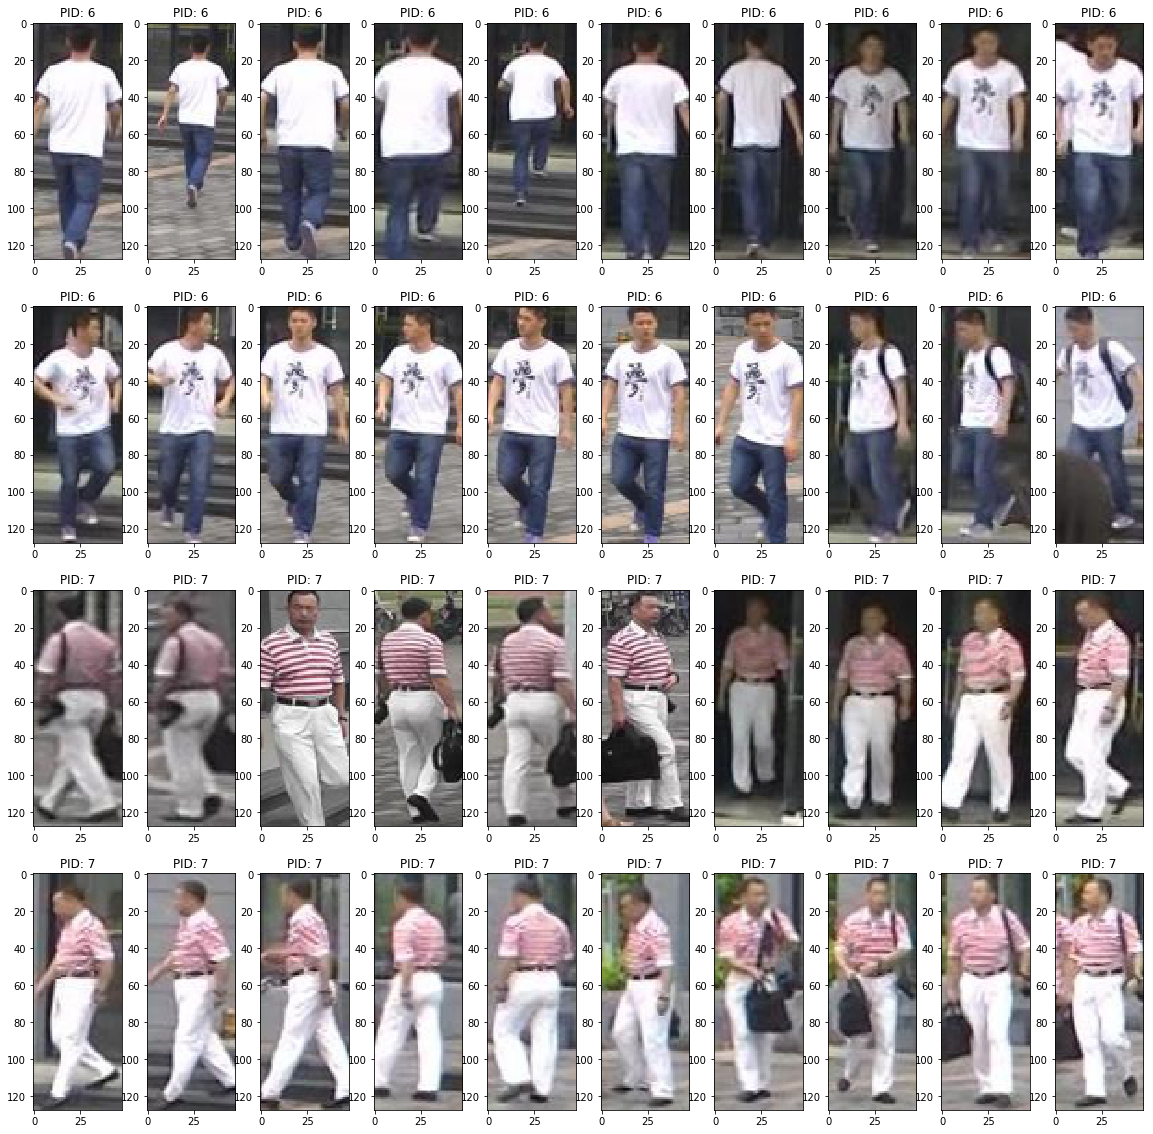

In [15]:
offset = 130
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(4,10,i+1)
    img = X_train[offset+i]
    plt.imshow(img)
    plt.title('PID: {}'.format(y_train[offset+i]))

### Validação

In [16]:
dataset.val[-10:]

[('00001473_05_0003.jpg', 98, 5),
 ('00001500_00_0000.jpg', 99, 0),
 ('00001500_00_0001.jpg', 99, 0),
 ('00001500_02_0000.jpg', 99, 2),
 ('00001500_02_0001.jpg', 99, 2),
 ('00001500_02_0002.jpg', 99, 2),
 ('00001500_04_0000.jpg', 99, 4),
 ('00001500_04_0001.jpg', 99, 4),
 ('00001500_05_0000.jpg', 99, 5),
 ('00001500_05_0001.jpg', 99, 5)]

In [17]:
X_val = []
y_val = []
val_cam_ids = []

for (fname, pid, cam_id) in dataset.val:
    fpath = osp.join(dataset.root, 'images', fname)
    img = load_img_and_resize(fpath, out_shape=OUTPUT_SHAPE)
    X_val.append(img)
    y_val.append(pid)
    val_cam_ids.append(cam_id)
    

# Transforma em np.array
X_val = np.concatenate(X_val, axis=0)
y_val = np.array(y_val)
val_cam_ids = np.array(val_cam_ids)

In [18]:
print(len(X_val), X_val[0].shape, X_val[0].dtype, X_val[0].min(), X_val[0].max())

1683 (128, 48, 3) uint8 15 253


In [19]:
print(len(y_val), y_val.shape, y_val.min(), y_val.max())

1683 (1683,) 0 99


In [20]:
print(len(val_cam_ids), val_cam_ids.shape, val_cam_ids.min(), val_cam_ids.max())

1683 (1683,) 0 5


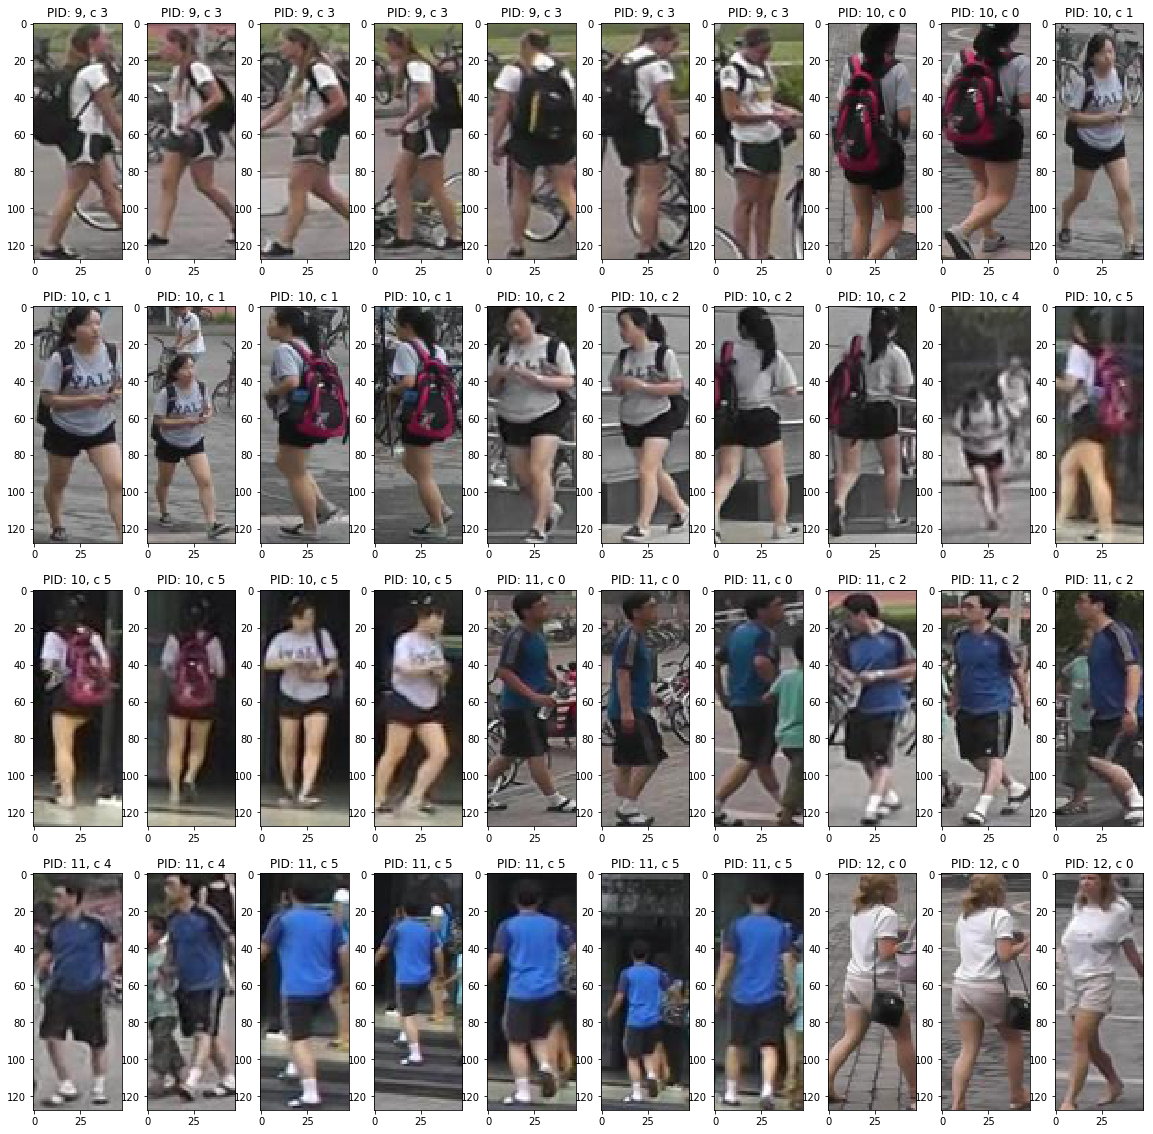

In [21]:
offset = 160
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(4,10,i+1)
    img = X_val[offset+i]
    plt.imshow(img)
    plt.title('PID: {}, c {}'.format(y_val[offset+i], val_cam_ids[offset+i]))

# Query e Gallery

O conjunto Gallery consiste dos mesmos PIDs que o conjunto Query, com adição do PID 0 que corresponde a categoria **distractors**. Os distractors são falsos positivos do detector DPM utilizado na detecção das pessoas e podem ser incluídos no conjunto Gallery para verificar a robustez do sistema de ReID em relação a imagens ruins.

In [22]:
print('Diferença entre os PIDs de Query e Gallery:')
print(set(dataset.split['gallery']).difference(set(dataset.split['query'])))

Diferença entre os PIDs de Query e Gallery:
{0}


In [23]:
dataset.split['query'][:10], dataset.split['query'][-10:]

([1, 3, 4, 5, 6, 8, 9, 13, 14, 15],
 [1486, 1488, 1490, 1491, 1493, 1494, 1497, 1498, 1499, 1501])

In [24]:
query_ids = dataset.split['query']
print('Quantidade de IDs: {}'.format(len(query_ids)))
print(query_ids[:10], '...', query_ids[-10:])

Quantidade de IDs: 750
[1, 3, 4, 5, 6, 8, 9, 13, 14, 15] ... [1486, 1488, 1490, 1491, 1493, 1494, 1497, 1498, 1499, 1501]


In [25]:
X_querygal = []
y_querygal = []
query_cam_ids = []
for (fname, pid, cam_id) in dataset.query:
    fpath = osp.join(dataset.root, 'images', fname)
    img = load_img_and_resize(fpath, out_shape=OUTPUT_SHAPE)
    X_querygal.append(img)
    y_querygal.append(pid)
    query_cam_ids.append(cam_id)

X_querygal = np.concatenate(X_querygal, axis=0)
query_pids, y_querygal = np.unique(y_querygal, return_inverse=True)
y_querygal += 1
query_cam_ids = np.array(query_cam_ids)

In [26]:
print(len(X_querygal), X_querygal[0].shape, X_querygal[0].dtype, X_querygal[0].min(), X_querygal[0].max())

16483 (128, 48, 3) uint8 9 245


In [27]:
print(len(y_querygal), y_querygal.shape, y_querygal.dtype, y_querygal.min(), y_querygal.max())

16483 (16483,) int64 1 750


In [28]:
print(len(query_cam_ids), query_cam_ids.shape, query_cam_ids.dtype, query_cam_ids.min(), query_cam_ids.max())

16483 (16483,) int64 0 5


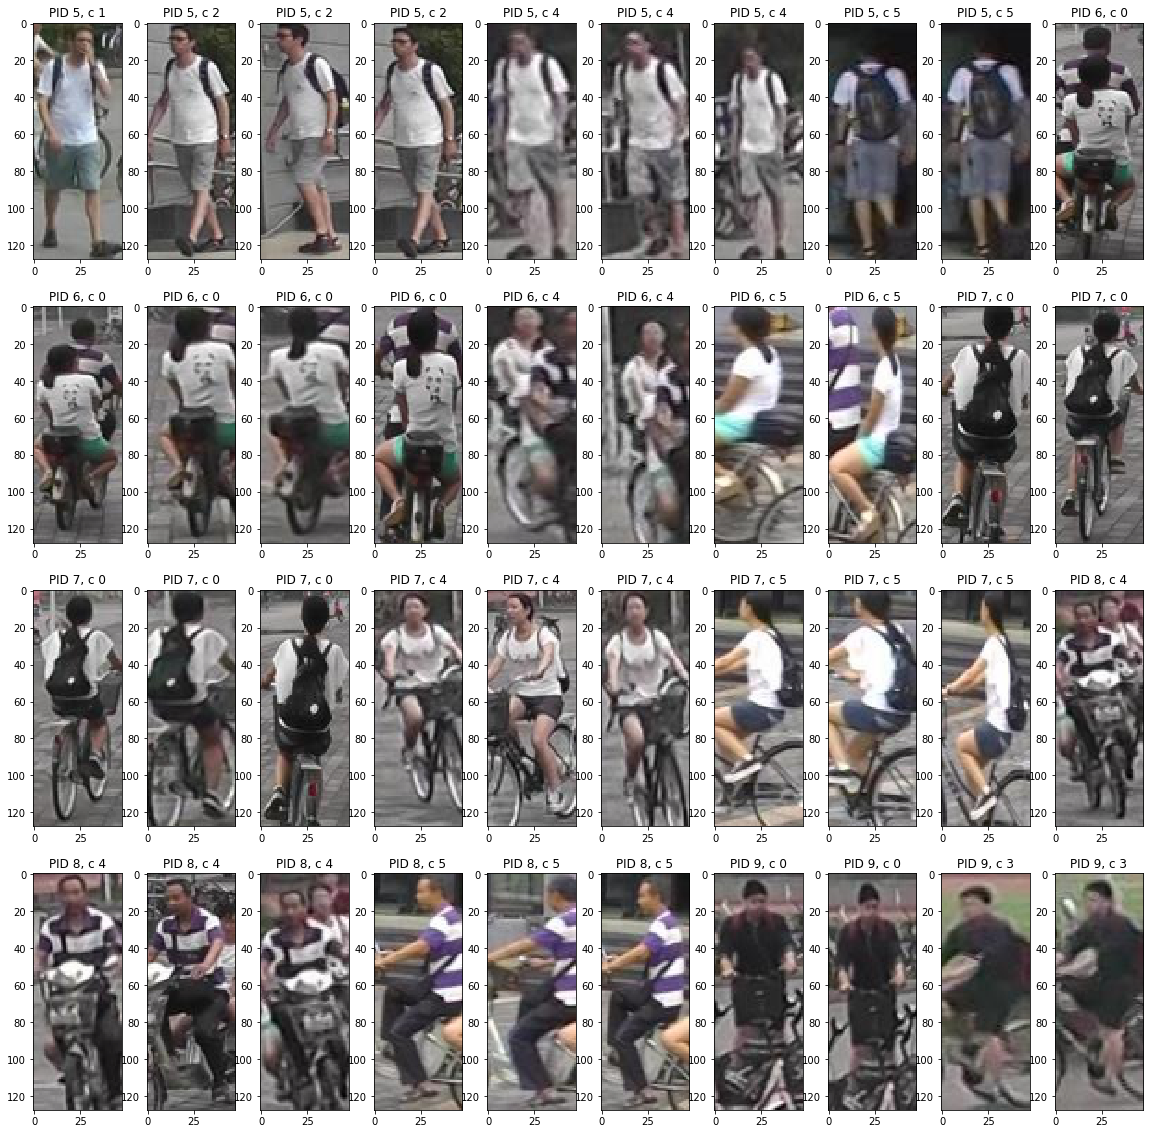

In [29]:
offset = 160
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(4,10,i+1)
    img = X_querygal[offset+i]
    plt.imshow(img)
    plt.title('PID {}, c {}'.format(y_querygal[offset+i], query_cam_ids[offset+i]))

# Distractors

In [30]:
print(dataset.split['gallery'])

[0, 1, 3, 4, 5, 6, 8, 9, 13, 14, 15, 16, 17, 18, 19, 21, 24, 25, 26, 29, 31, 33, 34, 36, 38, 39, 40, 41, 44, 45, 49, 50, 51, 54, 55, 58, 60, 61, 62, 63, 66, 71, 72, 73, 74, 75, 78, 80, 83, 85, 87, 89, 91, 92, 94, 96, 101, 102, 103, 109, 112, 113, 119, 120, 124, 126, 128, 130, 131, 133, 137, 138, 144, 145, 146, 147, 152, 153, 154, 155, 156, 157, 161, 163, 165, 168, 170, 171, 174, 182, 183, 186, 187, 188, 189, 191, 192, 194, 196, 198, 200, 203, 205, 207, 210, 213, 215, 217, 218, 219, 220, 226, 227, 228, 229, 230, 231, 233, 235, 238, 240, 244, 246, 247, 252, 253, 256, 257, 258, 260, 262, 263, 265, 267, 270, 271, 274, 275, 278, 280, 283, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 300, 302, 304, 305, 310, 311, 312, 315, 316, 319, 320, 322, 329, 330, 334, 336, 337, 342, 343, 345, 346, 351, 353, 355, 356, 360, 362, 363, 364, 365, 366, 372, 373, 378, 381, 387, 388, 391, 395, 396, 400, 401, 405, 406, 412, 416, 417, 418, 422, 425, 426, 428, 431, 436, 438, 439, 440, 443, 447, 448, 452

In [31]:
print('Diferença entre os PIDs de Query e Gallery:')
print(set(dataset.split['gallery']).difference(set(dataset.split['query'])))

Diferença entre os PIDs de Query e Gallery:
{0}


In [32]:
# Obtem a lista de imagens Distractors
gallery_data = _pluck(dataset.meta['identities'], [0])
print(gallery_data[:10])
print('Quantidade de imagens: {}'.format(len(gallery_data)))

[('00000000_00_0000.jpg', 0, 0), ('00000000_00_0001.jpg', 0, 0), ('00000000_00_0002.jpg', 0, 0), ('00000000_00_0003.jpg', 0, 0), ('00000000_00_0004.jpg', 0, 0), ('00000000_00_0005.jpg', 0, 0), ('00000000_00_0006.jpg', 0, 0), ('00000000_00_0007.jpg', 0, 0), ('00000000_00_0008.jpg', 0, 0), ('00000000_00_0009.jpg', 0, 0)]
Quantidade de imagens: 2798


In [33]:
X_distractors = []
y_distractors = []
distractors_cam_ids = []
for (fname, pid, cam_id) in dataset.gallery:
    if pid != 0:
        continue
    fpath = osp.join(dataset.root, 'images', fname)
    img = load_img_and_resize(fpath, out_shape=OUTPUT_SHAPE)
    X_distractors.append(img)
    y_distractors.append(pid)
    distractors_cam_ids.append(cam_id)

X_distractors = np.concatenate(X_distractors, axis=0)
y_distractors = np.array(y_distractors)
distractors_cam_ids = np.array(distractors_cam_ids)

In [34]:
print(len(X_distractors), X_distractors[0].shape, X_distractors[0].dtype, X_distractors[0].min(), X_distractors[0].max())

2798 (128, 48, 3) uint8 14 255


In [35]:
print(len(y_distractors), y_distractors.shape, y_distractors.dtype, y_distractors.min(), y_distractors.max())

2798 (2798,) int64 0 0


In [36]:
print(len(distractors_cam_ids), distractors_cam_ids.shape, distractors_cam_ids.dtype, distractors_cam_ids.min(), distractors_cam_ids.max())

2798 (2798,) int64 0 5


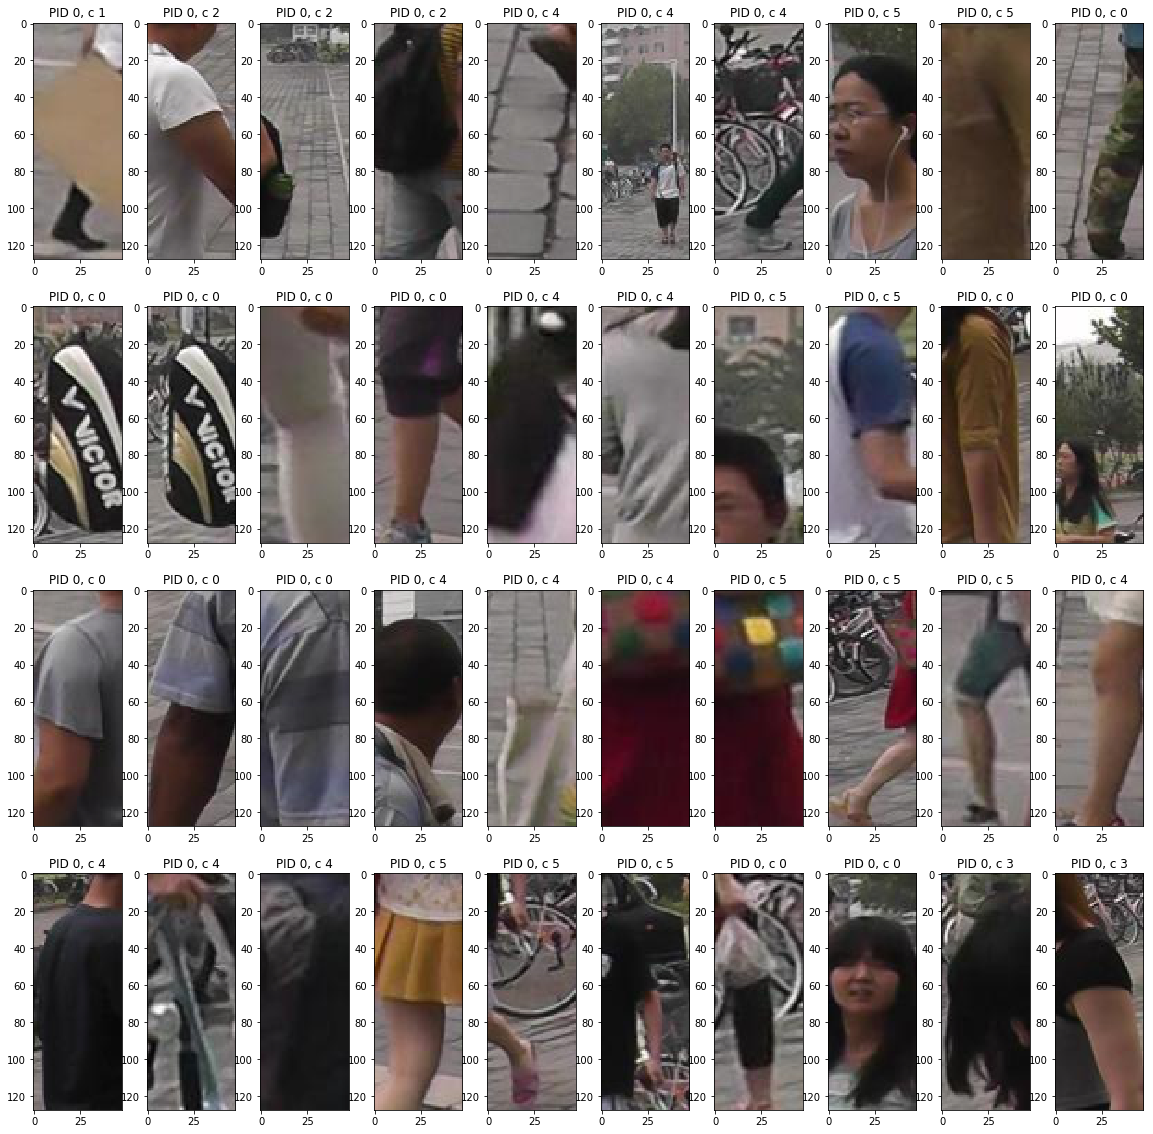

In [86]:
offset = 160
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(4,10,i+1)
    img = X_distractors[offset+i]
    plt.imshow(img)
    plt.title('PID {}, c {}'.format(y_distractors[offset+i], distractors_cam_ids[offset+i]))

# Salva o arquivo npz

In [38]:
np.savez('./datasets/market_train_correto', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, val_cam_ids=val_cam_ids)

In [37]:
np.savez('./datasets/market_test_correto', X_querygal=X_querygal, y_querygal=y_querygal, query_cam_ids=query_cam_ids, X_distractors=X_distractors, y_distractors=y_distractors, distractors_cam_ids=distractors_cam_ids)